In [274]:
import pandas as pd 
import numpy as np
import sklearn.datasets

In [275]:
df_train = pd.read_csv('train.csv', sep=',')
df_test = pd.read_csv('test.csv', sep=',')
target = df_train['SalePrice']

<AxesSubplot:xlabel='vale'>

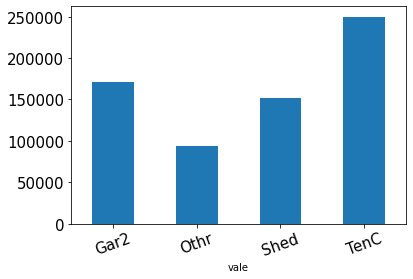

In [276]:
# Как влияют на цену такие параметры как Тенисный корд, лифт, пристройка, и т.д. значения nan пропущены.
saleprice = []
miscfeature = []
for i, z in zip(df_train['SalePrice'], df_train['MiscFeature']):
    if type(z) != float:
        saleprice .append(i)
        miscfeature.append(z)
        #print(z, '-------------', i)
df_trein1 = pd.DataFrame({'name':saleprice, 'vale': miscfeature}) 
df_trein1.groupby('vale')['name'].mean().plot.bar(fontsize=15, rot=20,)

<AxesSubplot:xlabel='YearBuilt'>

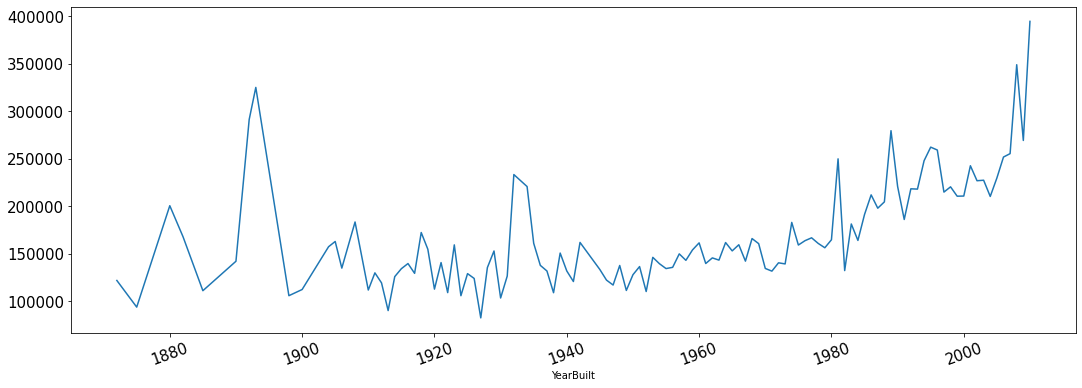

In [277]:
df_train.groupby('YearBuilt')['SalePrice'].mean().plot.line(figsize=(18, 6),fontsize=15, rot=20) # график влияния года на цену.

In [278]:
del df_train['SalePrice'] # удаляю колонку с ценой дома.
df = pd.concat([df_train, df_test]) # соединяю df_train и df_test для препроцессинга 


In [279]:
e = [] # колонки где количество nan не превышает 200-ти знаений.
for i, z in zip(sd.columns, sd.isnull().sum()):
    if 0 < z > 200 :
        e.append(i)

In [222]:
fices_values_str = {'MSZoning': 'RL', 'Utilities': 'AllPub', 'Exterior1st': 'VinylSd', 'Exterior2nd': 'VinylSd',
      'MasVnrType': 'None', 'BsmtQual': 'TA', 'BsmtCond': 'TA', 'BsmtExposure': 'No','BsmtFinType1': 'Unf', 
      'BsmtFinType2': 'Unf', 'Electrical': 'SBrkr', 'KitchenQual': 'TA', 'Functional': 'Typ', 'GarageType': 'Attchd',
      'GarageFinish': 'Unf', 'GarageQual': 'TA', 'GarageCond': 'TA', 'SaleType': 'WD'}
df = df.fillna(value=fices_values_str)   # заполснение NAN в строковых фичах . на часто встречаемый   

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt']) # Заполняю nan постройки горожа на год постройки дома .

fices_value_number = {'LotFrontage':df['LotFrontage'].mean(),'MasVnrArea': df['MasVnrArea'].mean(),
                      'BsmtFinSF1': df['BsmtFinSF1'].mean(), 'BsmtFinSF2': df['BsmtFinSF2'].mean(), 
                      'BsmtUnfSF': df['BsmtUnfSF'].mean(), 'TotalBsmtSF': df['TotalBsmtSF'].mean(),
                      'BsmtFullBath': df['BsmtFullBath'].mean(), 'BsmtHalfBath': df['BsmtHalfBath'].mean(), 
                      'GarageCars': df['GarageCars'].mean(), 'GarageArea': df['GarageArea'].mean()}
df = df.fillna(value=fices_value_number) # заполняю средним значением колонки с числовыми заначениями .

df['yearbuilt_cat'] = pd.cut(df['YearBuilt'], bins=[0, 1930, 1970, 2000, 5000], labels=[0, 1, 2, 3]) 
# колонку год разделяю на четыре категории и делаю новую колонку.

df['yearbuilt_rec'] = pd.cut(df['YearRemodAdd'], bins=[0, 1930, 1970, 2000, 5000], labels=[0, 1, 2, 3]) 
# год реконструкции дома (такая же, как и год строительства, если не было реконструкции или дополнений.

ignore_fices = ['MiscFeature','Fence','PoolQC','FireplaceQu','Alley','yearbuilt_cat', 'yearbuilt_rec',
                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
                'GarageYrBlt', 'GarageFinish', ] # колонки в которых значение NAN превышает 200 ячеек.


one_code_encoder_fices = ['MSSubClass', 'MSZoning','Street', 'LotShape','LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                   'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                    'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                      'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 
                   'SaleType', 'SaleCondition', ]

for i in one_code_encoder_fices: # one code encoder 
    df = pd.concat([df, pd.get_dummies(df[i], prefix=i)], axis=1) # разбиение колонок на под колонки.

In [223]:
#разделяю выборку на тренировочную и тестовую .
train = df.iloc[:len(target),:]

test = df.iloc[len(target):,:]
print(train.shape, test.shape)

(1460, 299) (1459, 299)


In [224]:
# Выбираю колонки на которых будет тренировка модели 
features = set(train.columns).difference(set(one_code_encoder_fices + ignore_fices)) 

In [225]:
x, y = train[features].to_numpy(), target.to_numpy()# конвертирую в numpy
x.shape, y.shape

((1460, 249), (1460,))

In [226]:
from sklearn.preprocessing import StandardScaler # нормирую данные
scaler = StandardScaler()
x_norm = scaler.fit_transform(x) # отклонения от средней 

In [227]:
from sklearn.model_selection import train_test_split 

# разделение тренировочной и тестовой выборок 
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.33, random_state=42)

In [228]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((978, 249), (978,), (482, 249), (482,))

In [269]:
# обучение модели, градиентный спуск 

from sklearn.metrics import make_scorer, mean_squared_log_error # метрика (оценка модели)
from sklearn.model_selection import GridSearchCV # подбирает лучьшие параметры для обучения модели.
from sklearn.ensemble import GradientBoostingRegressor #градиентный спуск (клас реализации обучения) 
#from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import Lasso
#from sklearn.ensemble import RandomForestRegressor
# параметры GradientBoostingRegressor

param_grid = {
    'loss': ['ls'],
    'learning_rate': [ 0.2 ],
    'n_estimators': [ 150,],
    'subsample': [ 1.0, ],
    'criterion': [ 'mse', ],
    
}

reg = GradientBoostingRegressor()

cv = GridSearchCV(
    estimator=reg,
    param_grid = param_grid,
    scoring=make_scorer(lambda t,p: mean_squared_log_error(t,p)**.5, greater_is_better=False),
    n_jobs=-1,
    refit=True, 
    cv=5,
    verbose=1

)
cv.fit(x_norm, y)
#cv.fit(x_train, y_train)




Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.2],
                         'loss': ['ls'], 'n_estimators': [150],
                         'subsample': [1.0]},
             scoring=make_scorer(<lambda>, greater_is_better=False), verbose=1)

In [270]:
from sklearn.metrics import mean_squared_error
print(f'''
    
    RMSE:
    train {mean_squared_error(cv.best_estimator_.predict(x_train), y_train)**.5 :.2f}
    test {mean_squared_error(cv.best_estimator_.predict(x_test), y_test)**.5 :.2f}

''')



    
    RMSE:
    train 9738.99
    test 9428.02




In [271]:
cv.best_params_

{'criterion': 'mse',
 'learning_rate': 0.2,
 'loss': 'ls',
 'n_estimators': 150,
 'subsample': 1.0}

In [272]:
cv.best_score_

-0.13589007095489314

In [273]:
y.std()

79415.29188606751

In [234]:
x_test_df = test[features].to_numpy() # конвертирую в numpy тренировочную выборку 
x_test_df.shape

(1459, 249)

In [235]:
# нормируем данные для тестовой выборки 
from sklearn.preprocessing import StandardScaler
x_test_norm = scaler.transform(x_test_df)

In [236]:
test['SalePrice'] = cv.predict(x_test_norm)

<ipython-input-236-7b03c41fc952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SalePrice'] = cv.predict(x_test_norm)


In [237]:
test[['Id', 'SalePrice']]

,Id,SalePrice
0,1461,116144.500879
1,1462,156886.038835
2,1463,183789.564621
3,1464,195132.436611
4,1465,213377.807632
...,...,...
1454,2915,75520.088652
1455,2916,77275.443652
1456,2917,165032.320208
1457,2918,116553.154601


In [238]:
test[['Id', 'SalePrice']].to_csv('home_sub.csv', index=False)